<a href="https://colab.research.google.com/github/Nsimaar99/Kaggle-Project/blob/master/Flowergirl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d alxmamaev/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 99% 223M/225M [00:06<00:00, 39.6MB/s]
100% 225M/225M [00:06<00:00, 35.8MB/s]


In [6]:
!unzip flowers-recognition.zip -d ./flowers


Archive:  flowers-recognition.zip
  inflating: ./flowers/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: ./flowers/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: ./flowers/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: ./flowers/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: ./flowers/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: ./flowers/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: ./flowers/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: ./flowers/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: ./flowers/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: ./flowers/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: ./flowers/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: ./flowers/flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: ./flowers/flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: ./flowers/flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: ./flowers/flowers/da

In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the main dataset directory (your flowers directory)
dataset_dir = '/content/Dflowers/flowers'
classes = os.listdir(dataset_dir)  # List of class names (e.g., daisy, rose, etc.)

# Define paths for train, val, and test directories
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# For each class, split the images into train, val, and test sets
for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)  # List of image filenames in this class

    # Split the dataset: 70% train, 15% val, 15% test
    train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Create subdirectories for this class in train, val, and test directories
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Move train images
    for image in train_images:
        shutil.move(os.path.join(class_path, image), os.path.join(train_class_dir, image))

    # Move validation images
    for image in val_images:
        shutil.move(os.path.join(class_path, image), os.path.join(val_class_dir, image))

    # Move test images
    for image in test_images:
        shutil.move(os.path.join(class_path, image), os.path.join(test_class_dir, image))

# After the move, print the class names and verify the dataset structure
print("Dataset has been split and organized.")
print(f"Classes found: {classes}")


Dataset has been split and organized.
Classes found: ['dandelion', 'daisy', 'tulip', 'sunflower', 'rose']


In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),   # Random crop and resize to 224x224
        transforms.RandomHorizontalFlip(),   # Random horizontal flip
        transforms.ToTensor(),               # Convert image to tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize based on ImageNet values
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),              # Resize the image to 256x256
        transforms.CenterCrop(224),          # Center crop to 224x224
        transforms.ToTensor(),               # Convert image to tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize based on ImageNet values
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),              # Resize the image to 256x256
        transforms.CenterCrop(224),          # Center crop to 224x224
        transforms.ToTensor(),               # Convert image to tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize based on ImageNet values
    ])
}


In [9]:
# Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(os.path.join(dataset_dir, '/content/Dflowers/flowers/train'), transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(os.path.join(dataset_dir, '/content/Dflowers/flowers/val'), transform=data_transforms['val'])
test_dataset = datasets.ImageFolder(os.path.join(dataset_dir, '/content/Dflowers/flowers/test'), transform=data_transforms['test'])

# Create DataLoaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Shuffle for training
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)     # No shuffle for validation
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)   # No shuffle for testing

# Print dataset sizes and class names
print(f"Train dataset size: {len(train_dataset)} images")
print(f"Validation dataset size: {len(val_dataset)} images")
print(f"Test dataset size: {len(test_dataset)} images")
print("Class-to-index mapping:", train_dataset.class_to_idx)


Train dataset size: 3019 images
Validation dataset size: 649 images
Test dataset size: 649 images
Class-to-index mapping: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [10]:
import torch
from torchvision import models
import torch.nn as nn
import torch.optim as optim

# Load the pre-trained ResNet50 model
model = models.resnet50(pretrained=True)

# Freeze the pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Define the number of classes
num_classes = 102

# Modify the fully connected layer to add input, hidden layers, and output layer (no Softmax)
model.fc = nn.Sequential(
    nn.Linear(2048, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(256, num_classes)  # Output layer (no Softmax)
)

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Loss function without softmax
optimizer = optim.Adam(model.fc.parameters(), lr=1e-3)

# Print the model architecture to verify
print(model)




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 194MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
!pip install tqdm

In [12]:
from tqdm import tqdm  # Import the tqdm module

# Training parameters
num_epochs = 10  # Adjust as necessary
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in tqdm(train_loader):  # Now tqdm is available
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Count correct predictions


    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # No gradient calculation during validation
        for val_images, val_labels in val_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)

            val_outputs = model(val_images)  # Forward pass
            val_loss = criterion(val_outputs, val_labels)  # Compute loss

            running_val_loss += val_loss.item() * val_images.size(0)
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    val_epoch_loss = running_val_loss / len(val_loader.dataset)
    val_epoch_accuracy = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Accuracy: {val_epoch_accuracy:.4f}")

print("Training complete.")

100%|██████████| 48/48 [00:23<00:00,  2.00it/s]


Epoch [1/10], Train Loss: 1.7761, Train Accuracy: 0.3740, Val Loss: 0.7024, Val Accuracy: 0.6918


100%|██████████| 48/48 [00:20<00:00,  2.36it/s]


Epoch [2/10], Train Loss: 0.7438, Train Accuracy: 0.7148, Val Loss: 0.5440, Val Accuracy: 0.7766


100%|██████████| 48/48 [00:21<00:00,  2.28it/s]


Epoch [3/10], Train Loss: 0.5818, Train Accuracy: 0.7900, Val Loss: 0.3761, Val Accuracy: 0.8644


100%|██████████| 48/48 [00:20<00:00,  2.34it/s]


Epoch [4/10], Train Loss: 0.5252, Train Accuracy: 0.8102, Val Loss: 0.3583, Val Accuracy: 0.8659


100%|██████████| 48/48 [00:20<00:00,  2.31it/s]


Epoch [5/10], Train Loss: 0.5258, Train Accuracy: 0.8049, Val Loss: 0.3795, Val Accuracy: 0.8767


100%|██████████| 48/48 [00:20<00:00,  2.30it/s]


Epoch [6/10], Train Loss: 0.4947, Train Accuracy: 0.8307, Val Loss: 0.3540, Val Accuracy: 0.8706


100%|██████████| 48/48 [00:20<00:00,  2.30it/s]


Epoch [7/10], Train Loss: 0.4510, Train Accuracy: 0.8430, Val Loss: 0.3251, Val Accuracy: 0.8860


100%|██████████| 48/48 [00:21<00:00,  2.28it/s]


Epoch [8/10], Train Loss: 0.4365, Train Accuracy: 0.8443, Val Loss: 0.3437, Val Accuracy: 0.8891


100%|██████████| 48/48 [00:21<00:00,  2.27it/s]


Epoch [9/10], Train Loss: 0.4338, Train Accuracy: 0.8579, Val Loss: 0.3310, Val Accuracy: 0.8783


100%|██████████| 48/48 [00:23<00:00,  2.05it/s]


Epoch [10/10], Train Loss: 0.4308, Train Accuracy: 0.8536, Val Loss: 0.3067, Val Accuracy: 0.8829
Training complete.


In [13]:
# Set the model to evaluation mode
model.eval()

# Initialize variables to track the test loss and accuracy
test_loss = 0.0
correct = 0
total = 0

# Test phase (no gradient calculations needed)
with torch.no_grad():
    for test_images, test_labels in test_loader:
        test_images, test_labels = test_images.to(device), test_labels.to(device)

        # Forward pass: compute predictions
        test_outputs = model(test_images)

        # Compute the loss
        loss = criterion(test_outputs, test_labels)
        test_loss += loss.item() * test_images.size(0)

        # Get the predicted class
        _, predicted = torch.max(test_outputs, 1)

        # Track the total number of correct predictions
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()

# Calculate the average test loss and accuracy
test_loss = test_loss / len(test_loader.dataset)
test_accuracy = correct / total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.2673, Test Accuracy: 0.9076


In [14]:
# Save the model
torch.save(model.state_dict(), 'flower_classification_model.pth')

In [15]:
# Load the model
model.load_state_dict(torch.load('flower_classification_model.pth'))

<ipython-input-15-24f39325d7dd>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('flower_classification_model.pth'))


<All keys matched successfully>

In [19]:
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torchvision import transforms

# Define the same transformations as used during training
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Function to preprocess the input image
def process_image(image_path):
    image = Image.open(image_path)
    image = preprocess(image)
    return image


In [20]:
# Function to show the image
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    # Convert image from Tensor to numpy array
    image = image.numpy().transpose((1, 2, 0))
    # Undo preprocessing transformations
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    ax.imshow(image)
    if title:
        ax.set_title(title)
    ax.axis('off')
    return ax


Predicted Classes and Probabilities:
Class: daisy, Probability: 0.8643
Class: sunflower, Probability: 0.0825
Class: tulip, Probability: 0.0317
Class: rose, Probability: 0.0117
Class: dandelion, Probability: 0.0098


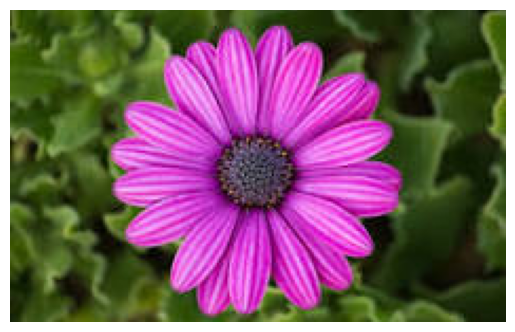

In [21]:
# Get class-to-index mapping and reverse it
idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

# Function to predict class with probabilities and show the image
def predict(image_path, model, topk=5):
    # Process the image and convert it to a tensor
    img = Image.open(image_path)
    img_transformed = data_transforms['test'](img).unsqueeze(0)

    # Move image to the device (GPU or CPU)
    img_transformed = img_transformed.to(device)

    # Get predictions
    model.eval()
    with torch.no_grad():
        output = model(img_transformed)
        probabilities = torch.softmax(output, dim=1)
        top_probs, top_indices = probabilities.topk(topk)

    top_probs = top_probs.cpu().numpy().squeeze()
    top_indices = top_indices.cpu().numpy().squeeze()

    # Map indices to class names
    top_classes = [idx_to_class[idx] for idx in top_indices]

    return top_probs, top_classes

# Display the image with predicted class names and probabilities
def display_image_with_predictions(image_path, model):
    # Get the predicted probabilities and class names
    top_probs, top_classes = predict(image_path, model)

    # Display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')

    # Print the top predicted classes and probabilities
    print("Predicted Classes and Probabilities:")
    for i in range(len(top_classes)):
        print(f"Class: {top_classes[i]}, Probability: {top_probs[i]:.4f}")

# Example usage with an image and a pre-trained model
image_path = '/content/flowergirl.jpg'
display_image_with_predictions(image_path, model)